In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Assignment/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Assignment


In [2]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import Dataset

trainloader = Dataset.trainloader
testloader =  Dataset.testloader
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Files already downloaded and verified


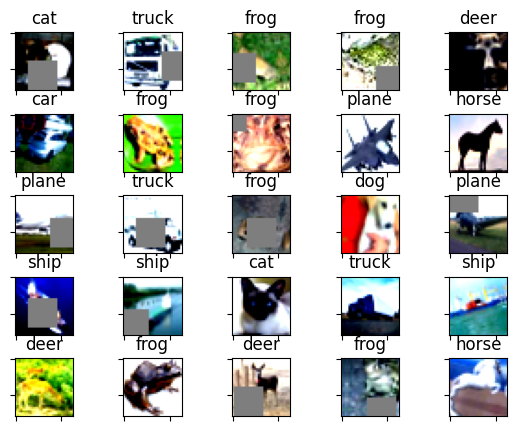

In [4]:
# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
# print labels
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
for i in range(0,25):
 plt.subplot(5, 5, i+1)
 frame1 = plt.gca()
 frame1.axes.xaxis.set_ticklabels([])
 frame1.axes.yaxis.set_ticklabels([])
 plt.imshow(np.transpose(((images[i]/2)+0.5).numpy(),(1,2,0)))
 plt.title(classes[labels[i]])

#Network

In [5]:
import Net
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
net = Net.Net('bn').to(device)
summary(net, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]             864
       BatchNorm2d-6           [-1, 32, 32, 32]              64
              ReLU-7           [-1, 32, 32, 32]               0
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]           4,608
      BatchNorm2d-10           [-1, 32, 32, 32]              64
             ReLU-11           [-1, 32, 32, 32]               0
          Dropout-12           [-1, 32, 32, 32]               0
           Conv2d-13           [-1, 96, 32, 32]          13,824
      BatchNorm2d-14           [-1

In [6]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import torch.nn as nn
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, nesterov=True, weight_decay=0.0005)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.00005, max_lr=0.05, step_size_up=40, step_size_down=60, mode='triangular2')
#scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

In [ ]:
import torch
from tqdm import tqdm
import traine, teste
#import test
test_acc = []
train_acc = []
learning_rate = []
for epoch in range(300):  # loop over the dataset multiple times
    scheduler.step()
    for param_group in optimizer.param_groups:
      print("lr= ",param_group['lr'])
    train_acc.append(traine.train(net, device, trainloader, optimizer, criterion, epoch))
    test_acc.append(teste.test(net, device, testloader))
    learning_rate.append(param_group['lr'])
print('Finished Training')

/opt/conda/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
  0%|          | 0/391 [00:00<?, ?it/s]

lr=  0.001298750000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 0 Loss=1.7466366291046143 Accuracy=30.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 39.71 %
lr=  0.0025475000000000025


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 1 Loss=1.4477614164352417 Accuracy=52.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 49.24 %
lr=  0.0037962500000000036


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 2 Loss=1.2744596004486084 Accuracy=61.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 54.96 %
lr=  0.005045000000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 3 Loss=1.5345484018325806 Accuracy=53.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 56.71 %
lr=  0.006293750000000005


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 4 Loss=1.322760820388794 Accuracy=56.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 60.10 %
lr=  0.007542500000000007


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 5 Loss=1.352972388267517 Accuracy=55.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 60.96 %
lr=  0.008791250000000007


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 6 Loss=1.318893313407898 Accuracy=63.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 63.80 %
lr=  0.010040000000000009


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 7 Loss=1.0667288303375244 Accuracy=68.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 66.44 %
lr=  0.01128875000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 8 Loss=1.0536450147628784 Accuracy=67.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 63.00 %
lr=  0.01253750000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 9 Loss=1.0277433395385742 Accuracy=73.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 66.96 %
lr=  0.013786250000000012


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 10 Loss=1.068619728088379 Accuracy=68.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 69.93 %
lr=  0.015035000000000014


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 11 Loss=0.8178976774215698 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 71.50 %
lr=  0.01628374999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 12 Loss=1.1343740224838257 Accuracy=67.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 64.39 %
lr=  0.017532500000000017


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 13 Loss=0.9370037317276001 Accuracy=73.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 68.18 %
lr=  0.018781249999999992


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 14 Loss=1.0021657943725586 Accuracy=72.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 72.25 %
lr=  0.020029999999999992


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 15 Loss=0.9922019839286804 Accuracy=67.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 73.50 %
lr=  0.021278749999999992


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 16 Loss=0.9952740669250488 Accuracy=67.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 72.70 %
lr=  0.022527499999999995


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 17 Loss=1.1538035869598389 Accuracy=66.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 68.43 %
lr=  0.023776249999999995


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 18 Loss=0.8056851625442505 Accuracy=85.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 73.03 %
lr=  0.025024999999999995


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 19 Loss=0.8868064880371094 Accuracy=73.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 74.63 %
lr=  0.02627375


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 20 Loss=0.7383643388748169 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 75.41 %
lr=  0.0275225


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 21 Loss=1.00166654586792 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 71.79 %
lr=  0.02877125


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 22 Loss=0.9148305654525757 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 74.07 %
lr=  0.03002


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 23 Loss=0.9138218760490417 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 75.15 %
lr=  0.03126875


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 24 Loss=0.822653591632843 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 74.03 %
lr=  0.032517500000000005


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 25 Loss=1.0273324251174927 Accuracy=72.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 76.67 %
lr=  0.033766250000000005


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 26 Loss=0.7432772517204285 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 76.04 %
lr=  0.035015000000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 27 Loss=0.9417856931686401 Accuracy=76.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 74.85 %
lr=  0.036263750000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 28 Loss=0.8650816082954407 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 77.31 %
lr=  0.03751250000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 29 Loss=0.8720992803573608 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 75.96 %
lr=  0.03876125000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 30 Loss=1.068000078201294 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 77.41 %
lr=  0.04001000000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 31 Loss=0.8907097578048706 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 78.23 %
lr=  0.04125875000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 32 Loss=0.6508545875549316 Accuracy=85.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 77.60 %
lr=  0.04250750000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 33 Loss=1.1260031461715698 Accuracy=70.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 76.33 %
lr=  0.04375625000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 34 Loss=1.012341856956482 Accuracy=75.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 78.29 %
lr=  0.04500499999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 35 Loss=0.7128702402114868 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 76.16 %
lr=  0.04625375000000002


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 36 Loss=0.8686037063598633 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 77.31 %
lr=  0.04750249999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 37 Loss=0.8511859178543091 Accuracy=87.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 77.90 %
lr=  0.04875125000000002


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 38 Loss=0.968963623046875 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 76.36 %
lr=  0.04999999999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 39 Loss=1.1026499271392822 Accuracy=72.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 76.84 %
lr=  0.04916750000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 40 Loss=0.6641348600387573 Accuracy=88.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 75.51 %
lr=  0.04833500000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 41 Loss=0.856715202331543 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 77.70 %
lr=  0.04750250000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 42 Loss=0.8396698236465454 Accuracy=87.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 77.23 %
lr=  0.04667000000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 43 Loss=0.7981200814247131 Accuracy=85.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 77.89 %
lr=  0.0458375


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 44 Loss=0.6360448002815247 Accuracy=87.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 77.24 %
lr=  0.04500500000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 45 Loss=0.6688472628593445 Accuracy=86.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 77.23 %
lr=  0.0441725


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 46 Loss=0.6868996024131775 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 78.59 %
lr=  0.043340000000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 47 Loss=0.63394695520401 Accuracy=85.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 78.40 %
lr=  0.042507500000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 48 Loss=0.8153479695320129 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 79.77 %
lr=  0.041675000000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 49 Loss=0.8008883595466614 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 77.45 %
lr=  0.040842500000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 50 Loss=0.7464652061462402 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 78.97 %
lr=  0.040010000000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 51 Loss=0.7949107885360718 Accuracy=85.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 78.58 %
lr=  0.039177500000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 52 Loss=0.6157470941543579 Accuracy=91.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 79.20 %
lr=  0.038345


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 53 Loss=0.675210177898407 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 78.27 %
lr=  0.037512500000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 54 Loss=0.7646563649177551 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 77.98 %
lr=  0.03668


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 55 Loss=0.8768766522407532 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 78.56 %
lr=  0.03584750000000002


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 56 Loss=0.8874093294143677 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 79.40 %
lr=  0.035015


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 57 Loss=0.7231582403182983 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.75 %
lr=  0.03418250000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 58 Loss=0.8586850166320801 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.70 %
lr=  0.03335


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 59 Loss=0.5443320274353027 Accuracy=85.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 76.68 %
lr=  0.03251750000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 60 Loss=0.4289565980434418 Accuracy=93.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.44 %
lr=  0.031685


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 61 Loss=0.9422098994255066 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 78.61 %
lr=  0.030852500000000015


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 62 Loss=0.7530750632286072 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 78.94 %
lr=  0.030019999999999995


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 63 Loss=0.8667381405830383 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 78.97 %
lr=  0.02918750000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 64 Loss=0.7769120931625366 Accuracy=75.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 78.06 %
lr=  0.02835499999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 65 Loss=0.6486867070198059 Accuracy=86.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 77.52 %
lr=  0.02752250000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 66 Loss=0.7131355404853821 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.22 %
lr=  0.02668999999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 67 Loss=0.7122188806533813 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 79.86 %
lr=  0.02585750000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 68 Loss=0.6927075982093811 Accuracy=86.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.64 %
lr=  0.02502500000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 69 Loss=0.6838263273239136 Accuracy=87.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 79.95 %
lr=  0.024192500000000006


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 70 Loss=1.0506728887557983 Accuracy=73.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.60 %
lr=  0.023360000000000006


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 71 Loss=0.6666773557662964 Accuracy=88.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.76 %
lr=  0.022527500000000006


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 72 Loss=0.6536771059036255 Accuracy=86.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.32 %
lr=  0.021695000000000002


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 73 Loss=0.9307066202163696 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.17 %
lr=  0.020862500000000003


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 74 Loss=0.6641790866851807 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.95 %
lr=  0.020030000000000003


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 75 Loss=0.8492220640182495 Accuracy=75.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.80 %
lr=  0.0191975


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 76 Loss=0.8984891176223755 Accuracy=76.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.33 %
lr=  0.018365


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 77 Loss=0.6906694173812866 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.15 %
lr=  0.0175325


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 78 Loss=0.831185519695282 Accuracy=76.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.37 %
lr=  0.0167


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 79 Loss=0.6963624358177185 Accuracy=85.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.89 %
lr=  0.0158675


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 80 Loss=0.7124574780464172 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.05 %
lr=  0.015035000000000014


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 81 Loss=0.7668054699897766 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.62 %
lr=  0.014202499999999995


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 82 Loss=0.7247422337532043 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.18 %
lr=  0.013370000000000014


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 83 Loss=0.8375848531723022 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.90 %
lr=  0.012537499999999993


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 84 Loss=0.41334208846092224 Accuracy=86.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.01 %
lr=  0.01170500000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 85 Loss=0.6953543424606323 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.85 %
lr=  0.010872499999999992


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 86 Loss=0.6977455615997314 Accuracy=76.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.83 %
lr=  0.010040000000000009


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 87 Loss=0.693739652633667 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.60 %
lr=  0.00920749999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 88 Loss=0.6681071519851685 Accuracy=76.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.76 %
lr=  0.008375000000000007


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 89 Loss=0.5844404101371765 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.05 %
lr=  0.0075424999999999884


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 90 Loss=0.6246734857559204 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.20 %
lr=  0.006710000000000007


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 91 Loss=0.5332600474357605 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.35 %
lr=  0.005877499999999987


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 92 Loss=0.6739175915718079 Accuracy=85.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.76 %
lr=  0.005045000000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 93 Loss=0.5644909143447876 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.59 %
lr=  0.004212500000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 94 Loss=0.6135445833206177 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.13 %
lr=  0.0033800000000000037


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 95 Loss=0.8144558668136597 Accuracy=73.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.22 %
lr=  0.0025475000000000025


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 96 Loss=0.44445735216140747 Accuracy=85.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.45 %
lr=  0.0017150000000000017


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 97 Loss=0.6147176027297974 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.93 %
lr=  0.0008825000000000009


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 98 Loss=0.6170374751091003 Accuracy=76.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.07 %
lr=  5e-05


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 99 Loss=0.6070322394371033 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.19 %
lr=  0.0006743749999999867


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 100 Loss=0.41251617670059204 Accuracy=87.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.26 %
lr=  0.001298750000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 101 Loss=0.5576893091201782 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.49 %
lr=  0.0019231250000000155


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 102 Loss=0.609394907951355 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.91 %
lr=  0.0025475000000000025


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 103 Loss=0.5861784219741821 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.42 %
lr=  0.003171874999999989


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 104 Loss=0.5041918158531189 Accuracy=86.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.92 %
lr=  0.0037962500000000036


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 105 Loss=0.8238628506660461 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.58 %
lr=  0.004420625000000017


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 106 Loss=0.6408028602600098 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.01 %
lr=  0.005045000000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 107 Loss=0.6046402454376221 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.67 %
lr=  0.005669374999999991


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 108 Loss=0.635399341583252 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.81 %
lr=  0.006293750000000005


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 109 Loss=0.6008461713790894 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.54 %
lr=  0.00691812500000002


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 110 Loss=0.7847288250923157 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.11 %
lr=  0.007542500000000007


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 111 Loss=0.5123588442802429 Accuracy=92.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.97 %
lr=  0.008166874999999994


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 112 Loss=0.47937431931495667 Accuracy=90.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.76 %
lr=  0.00879124999999998


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 113 Loss=0.48558205366134644 Accuracy=87.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.13 %
lr=  0.009415624999999995


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 114 Loss=0.42281994223594666 Accuracy=87.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.59 %
lr=  0.010040000000000009


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 115 Loss=0.7154111862182617 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.22 %
lr=  0.010664374999999995


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 116 Loss=0.5595977306365967 Accuracy=90.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.74 %
lr=  0.011288749999999983


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 117 Loss=0.819329559803009 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.94 %
lr=  0.011913124999999997


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 118 Loss=0.698379635810852 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.35 %
lr=  0.01253750000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 119 Loss=0.7414684295654297 Accuracy=71.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.26 %
lr=  0.013161874999999998


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 120 Loss=0.684810996055603 Accuracy=85.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.64 %
lr=  0.013786249999999984


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 121 Loss=0.7021651268005371 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.44 %
lr=  0.014410625


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 122 Loss=0.6016284823417664 Accuracy=87.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.75 %
lr=  0.015035000000000014


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 123 Loss=0.535901665687561 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.02 %
lr=  0.015659375


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 124 Loss=0.7308609485626221 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.67 %
lr=  0.01628374999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 125 Loss=0.6550148725509644 Accuracy=86.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.23 %
lr=  0.016908125000000003


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 126 Loss=0.6337311863899231 Accuracy=86.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.93 %
lr=  0.017532500000000017


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 127 Loss=0.7078221440315247 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.76 %
lr=  0.018156875000000003


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 128 Loss=0.7453588247299194 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.17 %
lr=  0.018781249999999992


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 129 Loss=0.7706304788589478 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.34 %
lr=  0.019405625000000006


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 130 Loss=0.6594169735908508 Accuracy=85.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.57 %
lr=  0.02003000000000002


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 131 Loss=0.6486482620239258 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.33 %
lr=  0.020654375000000006


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 132 Loss=0.6977444291114807 Accuracy=86.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.59 %
lr=  0.021278749999999992


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 133 Loss=0.5491188168525696 Accuracy=88.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.72 %
lr=  0.021903125000000006


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 134 Loss=0.7570520043373108 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.97 %
lr=  0.022527500000000023


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 135 Loss=0.7663520574569702 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.21 %
lr=  0.02315187500000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 136 Loss=0.8597111701965332 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.06 %
lr=  0.023776249999999995


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 137 Loss=0.5920965075492859 Accuracy=91.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.41 %
lr=  0.02440062499999998


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 138 Loss=0.6419553160667419 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.92 %
lr=  0.025024999999999995


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 139 Loss=0.7130666375160217 Accuracy=90.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.92 %
lr=  0.02460875


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 140 Loss=0.7858785390853882 Accuracy=87.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.44 %
lr=  0.024192500000000006


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 141 Loss=0.6792786717414856 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 79.82 %
lr=  0.023776250000000016


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 142 Loss=0.6679956316947937 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.76 %
lr=  0.023360000000000006


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 143 Loss=0.8183754682540894 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.83 %
lr=  0.022943749999999995


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 144 Loss=0.6526244878768921 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.50 %
lr=  0.022527500000000006


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 145 Loss=0.8100210428237915 Accuracy=85.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.44 %
lr=  0.022111250000000013


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 146 Loss=0.7861284613609314 Accuracy=85.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.42 %
lr=  0.021695000000000002


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 147 Loss=0.5298327803611755 Accuracy=86.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.19 %
lr=  0.021278749999999992


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 148 Loss=0.6186223030090332 Accuracy=90.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.92 %
lr=  0.020862500000000003


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 149 Loss=0.7252312898635864 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.31 %
lr=  0.020446250000000013


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 150 Loss=0.5067761540412903 Accuracy=87.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.87 %
lr=  0.020030000000000003


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 151 Loss=0.6345992088317871 Accuracy=87.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.29 %
lr=  0.019613749999999992


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 152 Loss=0.6433993577957153 Accuracy=87.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.99 %
lr=  0.0191975


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 153 Loss=0.5971691608428955 Accuracy=87.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.02 %
lr=  0.01878125000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 154 Loss=0.6589532494544983 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.32 %
lr=  0.018365


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 155 Loss=0.6652469635009766 Accuracy=86.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.25 %
lr=  0.017948749999999992


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 156 Loss=0.6314830183982849 Accuracy=87.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.19 %
lr=  0.0175325


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 157 Loss=0.5583212375640869 Accuracy=90.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.50 %
lr=  0.017116250000000006


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 158 Loss=0.6818208694458008 Accuracy=86.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.10 %
lr=  0.0167


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 159 Loss=0.6600722670555115 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.68 %
lr=  0.01628374999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 160 Loss=0.6414198875427246 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.13 %
lr=  0.0158675


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 161 Loss=0.5047817826271057 Accuracy=86.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.98 %
lr=  0.015451250000000007


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 162 Loss=0.6788135170936584 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.53 %
lr=  0.015035000000000014


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 163 Loss=0.5981758832931519 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.97 %
lr=  0.014618750000000003


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 164 Loss=0.7183283567428589 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.89 %
lr=  0.014202499999999995


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 165 Loss=0.6287347078323364 Accuracy=88.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.23 %
lr=  0.013786250000000003


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 166 Loss=0.9172163009643555 Accuracy=76.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.40 %
lr=  0.013370000000000014


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 167 Loss=0.8160611391067505 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.37 %
lr=  0.012953750000000003


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 168 Loss=0.7411215901374817 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.80 %
lr=  0.012537499999999993


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 169 Loss=0.8663567304611206 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.39 %
lr=  0.012121250000000002


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 170 Loss=0.5660200119018555 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.60 %
lr=  0.01170500000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 171 Loss=0.47146767377853394 Accuracy=88.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.72 %
lr=  0.011288750000000002


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 172 Loss=0.5358713865280151 Accuracy=87.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.95 %
lr=  0.010872499999999992


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 173 Loss=0.4930303990840912 Accuracy=93.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.37 %
lr=  0.01045625


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 174 Loss=0.73797208070755 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.73 %
lr=  0.010040000000000009


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 175 Loss=0.6319461464881897 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.34 %
lr=  0.009623749999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 176 Loss=0.5768845677375793 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.30 %
lr=  0.00920749999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 177 Loss=0.5158141851425171 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.66 %
lr=  0.008791249999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 178 Loss=0.6313930749893188 Accuracy=85.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.67 %
lr=  0.008375000000000007


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 179 Loss=0.5900115370750427 Accuracy=85.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.17 %
lr=  0.007958749999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 180 Loss=0.5042250156402588 Accuracy=88.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.45 %
lr=  0.0075424999999999884


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 181 Loss=0.6290971040725708 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.89 %
lr=  0.007126249999999997


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 182 Loss=0.6583490967750549 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.37 %
lr=  0.006710000000000007


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 183 Loss=0.4056894779205322 Accuracy=90.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.18 %
lr=  0.006293749999999996


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 184 Loss=0.5423098802566528 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.53 %
lr=  0.005877499999999987


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 185 Loss=0.760604202747345 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.92 %
lr=  0.005461249999999996


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 186 Loss=0.44355669617652893 Accuracy=88.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.50 %
lr=  0.005045000000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 187 Loss=0.48871102929115295 Accuracy=87.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.77 %
lr=  0.004628750000000013


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 188 Loss=0.7035560011863708 Accuracy=76.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.81 %
lr=  0.004212500000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 189 Loss=0.7205104827880859 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.76 %
lr=  0.0037962499999999945


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 190 Loss=0.6116632223129272 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.62 %
lr=  0.0033800000000000037


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 191 Loss=0.6263490915298462 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.92 %
lr=  0.002963750000000012


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 192 Loss=0.6374101638793945 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.63 %
lr=  0.0025475000000000025


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 193 Loss=0.7268103957176208 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.58 %
lr=  0.002131249999999993


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 194 Loss=0.7499358057975769 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.49 %
lr=  0.0017150000000000017


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 195 Loss=0.4235662817955017 Accuracy=87.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.10 %
lr=  0.0012987500000000104


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 196 Loss=0.560096800327301 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.12 %
lr=  0.0008825000000000009


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 197 Loss=0.4388609826564789 Accuracy=88.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.28 %
lr=  0.0004662499999999912


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 198 Loss=0.2849198877811432 Accuracy=92.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.19 %
lr=  5e-05


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 199 Loss=0.4888456463813782 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.46 %
lr=  0.0003621874999999934


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 200 Loss=0.5403600931167603 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.73 %
lr=  0.0006743750000000006


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 201 Loss=0.5636561512947083 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.21 %
lr=  0.000986562499999994


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 202 Loss=0.5155349373817444 Accuracy=85.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.35 %
lr=  0.001298750000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 203 Loss=0.48734626173973083 Accuracy=86.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.34 %
lr=  0.0016109374999999943


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 204 Loss=0.4958142340183258 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.86 %
lr=  0.0019231250000000017


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 205 Loss=0.4531669020652771 Accuracy=86.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.78 %
lr=  0.002235312499999995


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 206 Loss=0.4766324460506439 Accuracy=85.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.72 %
lr=  0.0025475000000000025


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 207 Loss=0.6569174528121948 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.08 %
lr=  0.002859687499999996


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 208 Loss=0.47187700867652893 Accuracy=87.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.13 %
lr=  0.003171875000000003


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 209 Loss=0.4506939947605133 Accuracy=86.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.60 %
lr=  0.0034840624999999963


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 210 Loss=0.5108951926231384 Accuracy=87.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.77 %
lr=  0.0037962500000000036


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 211 Loss=0.4345014691352844 Accuracy=91.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.13 %
lr=  0.004108437499999997


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 212 Loss=0.4833648204803467 Accuracy=86.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.35 %
lr=  0.0044206250000000035


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 213 Loss=0.5777077078819275 Accuracy=85.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.89 %
lr=  0.0047328124999999974


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 214 Loss=0.701882541179657 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.57 %
lr=  0.005045000000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 215 Loss=0.807600200176239 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.54 %
lr=  0.005357187499999997


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 216 Loss=0.4292510151863098 Accuracy=91.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.43 %
lr=  0.005669375000000005


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 217 Loss=0.4623298645019531 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.76 %
lr=  0.005981562499999998


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 218 Loss=0.6714940071105957 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.21 %
lr=  0.006293750000000005


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 219 Loss=0.7349427342414856 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.90 %
lr=  0.006605937499999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 220 Loss=0.5910426378250122 Accuracy=85.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.63 %
lr=  0.006918125000000006


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 221 Loss=0.6196700930595398 Accuracy=85.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.27 %
lr=  0.0072303125


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 222 Loss=0.6694580316543579 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.05 %
lr=  0.007542500000000007


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 223 Loss=0.5943037867546082 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.18 %
lr=  0.0078546875


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 224 Loss=0.5156259536743164 Accuracy=87.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.45 %
lr=  0.008166874999999994


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 225 Loss=0.8475914001464844 Accuracy=76.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.74 %
lr=  0.0084790625


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 226 Loss=0.5874307155609131 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.50 %
lr=  0.008791249999999994


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 227 Loss=0.7027027606964111 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.47 %
lr=  0.0091034375


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 228 Loss=0.539226233959198 Accuracy=86.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.83 %
lr=  0.009415624999999995


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 229 Loss=0.8072081804275513 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.27 %
lr=  0.009727812500000002


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 230 Loss=0.822350025177002 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.14 %
lr=  0.010039999999999995


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 231 Loss=0.892143726348877 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.25 %
lr=  0.010352187500000002


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 232 Loss=0.522912859916687 Accuracy=88.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.12 %
lr=  0.010664374999999995


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 233 Loss=0.6082605719566345 Accuracy=86.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.39 %
lr=  0.010976562500000002


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 234 Loss=0.9036011695861816 Accuracy=76.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.55 %
lr=  0.011288749999999997


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 235 Loss=0.4748343527317047 Accuracy=87.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.09 %
lr=  0.011600937500000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 236 Loss=0.6645330190658569 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.36 %
lr=  0.011913124999999997


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 237 Loss=0.589291512966156 Accuracy=85.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.76 %
lr=  0.012225312500000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 238 Loss=0.571190357208252 Accuracy=91.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.19 %
lr=  0.012537499999999997


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 239 Loss=0.4826829433441162 Accuracy=88.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.60 %
lr=  0.012329374999999998


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 240 Loss=0.6840384602546692 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.42 %
lr=  0.012121250000000002


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 241 Loss=0.6034625768661499 Accuracy=87.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80.69 %
lr=  0.011913124999999997


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 242 Loss=0.5974982380867004 Accuracy=87.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.44 %
lr=  0.011705000000000002


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 243 Loss=0.7327184081077576 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.48 %
lr=  0.011496874999999997


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 244 Loss=0.8136672973632812 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.68 %
lr=  0.011288750000000002


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 245 Loss=0.7128615975379944 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.27 %
lr=  0.011080624999999997


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 246 Loss=0.5932820439338684 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.57 %
lr=  0.0108725


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 247 Loss=0.4594079852104187 Accuracy=92.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.63 %
lr=  0.010664374999999995


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 248 Loss=0.6582735776901245 Accuracy=87.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.08 %
lr=  0.01045625


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 249 Loss=0.6597134470939636 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.12 %
lr=  0.010248125000000005


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 250 Loss=0.539057731628418 Accuracy=88.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.94 %
lr=  0.01004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 251 Loss=0.7961211800575256 Accuracy=75.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.38 %
lr=  0.009831875000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 252 Loss=0.7011359930038452 Accuracy=85.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.81 %
lr=  0.009623749999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 253 Loss=0.5682593584060669 Accuracy=87.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.17 %
lr=  0.009415625000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 254 Loss=0.5432885885238647 Accuracy=85.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.42 %
lr=  0.009207499999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 255 Loss=0.5852245092391968 Accuracy=87.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.96 %
lr=  0.008999375000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 256 Loss=0.5755027532577515 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.63 %
lr=  0.008791249999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 257 Loss=0.4845845103263855 Accuracy=87.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.22 %
lr=  0.008583125000000002


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 258 Loss=0.7791818380355835 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.60 %
lr=  0.008374999999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 259 Loss=0.5736758708953857 Accuracy=87.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.22 %
lr=  0.008166875000000002


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 260 Loss=0.6503313779830933 Accuracy=85.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.72 %
lr=  0.007958749999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 261 Loss=0.7416843175888062 Accuracy=85.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.82 %
lr=  0.007750625000000003


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 262 Loss=0.5416941046714783 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.56 %
lr=  0.007542499999999998


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 263 Loss=0.710805356502533 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.06 %
lr=  0.0073343750000000015


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 264 Loss=0.7988195419311523 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.35 %
lr=  0.007126249999999997


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 265 Loss=0.47424834966659546 Accuracy=91.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.49 %
lr=  0.0069181250000000015


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 266 Loss=0.46864089369773865 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.03 %
lr=  0.006709999999999997


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 267 Loss=0.4119087755680084 Accuracy=87.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.29 %
lr=  0.006501875000000002


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 268 Loss=0.7331992387771606 Accuracy=72.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.98 %
lr=  0.006293749999999996


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 269 Loss=0.6229274868965149 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.54 %
lr=  0.006085625000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 270 Loss=0.6723712086677551 Accuracy=81.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.52 %
lr=  0.005877499999999996


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 271 Loss=0.6654748916625977 Accuracy=86.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.48 %
lr=  0.005669375000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 272 Loss=0.6762493252754211 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.84 %
lr=  0.005461249999999996


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 273 Loss=0.717801570892334 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.68 %
lr=  0.005253125


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 274 Loss=0.44386982917785645 Accuracy=90.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.13 %
lr=  0.005045000000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 275 Loss=0.5297730565071106 Accuracy=86.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.40 %
lr=  0.004836874999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 276 Loss=0.5780168771743774 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.14 %
lr=  0.004628750000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 277 Loss=0.5008871555328369 Accuracy=87.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.43 %
lr=  0.004420624999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 278 Loss=0.5533484220504761 Accuracy=78.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.31 %
lr=  0.004212500000000004


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 279 Loss=0.4777364730834961 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.40 %
lr=  0.004004374999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 280 Loss=0.44834965467453003 Accuracy=90.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.28 %
lr=  0.0037962500000000036


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 281 Loss=0.5808023810386658 Accuracy=86.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.55 %
lr=  0.003588124999999999


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 282 Loss=0.6376043558120728 Accuracy=76.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.17 %
lr=  0.0033800000000000037


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 283 Loss=0.7454679012298584 Accuracy=76.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.58 %
lr=  0.0031718749999999985


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 284 Loss=0.5621782541275024 Accuracy=86.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.79 %
lr=  0.002963750000000003


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 285 Loss=0.49355021119117737 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.85 %
lr=  0.002755624999999998


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 286 Loss=0.45554009079933167 Accuracy=86.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.88 %
lr=  0.0025475000000000025


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 287 Loss=0.5982229709625244 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.18 %
lr=  0.0023393749999999977


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 288 Loss=0.5096122622489929 Accuracy=82.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.06 %
lr=  0.002131250000000002


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 289 Loss=0.5577515363693237 Accuracy=80.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.92 %
lr=  0.001923124999999997


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 290 Loss=0.5425139665603638 Accuracy=87.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.33 %
lr=  0.0017150000000000017


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 291 Loss=0.5097002983093262 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.58 %
lr=  0.0015068749999999967


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 292 Loss=0.5289016962051392 Accuracy=83.75


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.27 %
lr=  0.001298750000000001


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 293 Loss=0.5126204490661621 Accuracy=85.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.08 %
lr=  0.0010906249999999963


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 294 Loss=0.5383306741714478 Accuracy=77.50


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.59 %
lr=  0.0008825000000000009


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 295 Loss=0.2736597955226898 Accuracy=90.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.53 %
lr=  0.000674374999999996


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 296 Loss=0.39494606852531433 Accuracy=91.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.64 %
lr=  0.00046625000000000046


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 297 Loss=0.58253413438797 Accuracy=75.00


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.45 %
lr=  0.0002581249999999956


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 298 Loss=0.49604225158691406 Accuracy=86.25


  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.74 %
lr=  5e-05


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch= 299 Loss=0.35621756315231323 Accuracy=85.00


100%|██████████| 79/79 [00:04<00:00, 17.47it/s]

Accuracy of the network on the 10000 test images: 87.80 %
Finished Training


## Train/Test/LR curve

Text(0, 0.5, 'lr')

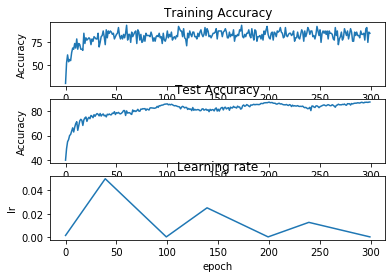

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3)
axs[0].plot(train_acc)
axs[0].set_title("Training Accuracy")
axs[0].set_xlabel("Batch")
axs[0].set_ylabel("Accuracy")
axs[1].plot(test_acc)
axs[1].set_title("Test Accuracy")
axs[1].set_xlabel("Batch")
axs[1].set_ylabel("Accuracy")
axs[2].plot(learning_rate)
axs[2].set_title("Learning rate")
axs[2].set_xlabel("epoch")
axs[2].set_ylabel("lr")

## Misclassified Images

  0%|          | 0/79 [00:03<?, ?it/s]


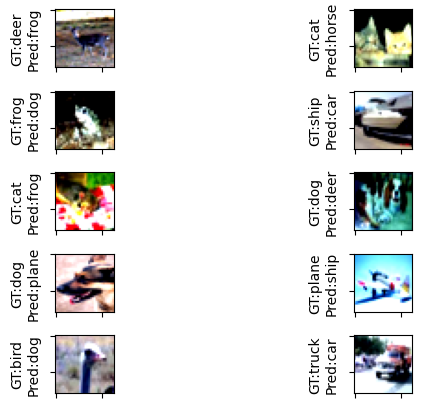

In [8]:
from tqdm import tqdm
net.eval()
missed = []
with torch.no_grad():
      pbar1 = tqdm(testloader)
      for i, (data, target) in enumerate(pbar1):
           data, target = data.to(device), target.to(device)
           outputs = net(data)
           _, predicted = torch.max(outputs.data, 1)
           target1 = target.cpu().numpy()
           predicted1 = predicted.cpu().numpy()
           for i in range(64):
              if target1[i]!=predicted1[i]:
                 missed.append(i)
           break

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
for i in range(0,10):
 plt.subplot(5, 2, i+1)
 frame1 = plt.gca()
 frame1.axes.xaxis.set_ticklabels([])
 frame1.axes.yaxis.set_ticklabels([])
 plt.imshow(np.transpose(((data[missed[i]].cpu()/2)+0.5).numpy(),(1,2,0)))
 plt.ylabel("GT:"+str(classes[target1[missed[i]]])+'\nPred:'+str(classes[predicted1[missed[i]]]))



## Correctly classified Images

  0%|          | 0/79 [00:04<?, ?it/s]


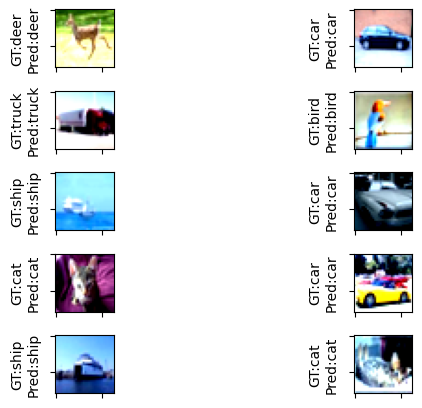

In [9]:
from tqdm import tqdm
net.eval()
missed = []
with torch.no_grad():
      pbar1 = tqdm(testloader)
      for i, (data, target) in enumerate(pbar1):
           data, target = data.to(device), target.to(device)
           outputs = net(data)
           _, predicted = torch.max(outputs.data, 1)
           target1 = target.cpu().numpy()
           predicted1 = predicted.cpu().numpy()
           for i in range(64):
              if target1[i]==predicted1[i]:
                 missed.append(i)
           break

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
for i in range(0,10):
 plt.subplot(5, 2, i+1)
 frame1 = plt.gca()
 frame1.axes.xaxis.set_ticklabels([])
 frame1.axes.yaxis.set_ticklabels([])
 plt.imshow(np.transpose(((data[missed[i]].cpu()/2)+0.5).numpy(),(1,2,0)))
 plt.ylabel("GT:"+str(classes[target1[missed[i]]])+'\nPred:'+str(classes[predicted1[missed[i]]]))

